## SC1015 Project

Why are some songs more popular than others? What makes a song popular? In this project, we utilize the Song Popularity Dataset on Kaggle to find out if the popularity of a song can be determined by acoustic data such as acousticness, danceability, liveliness and energy.

We aim to:
1. Accurately predict how popular songs are/will be based upon their characteristics. (Testing on songs in the Spotify Music Dataset)
2. Demonstrate how relevant our predictions are in real life by predicting the popularity of songs on the Billboard top 100 and checking whether their popularity is reflected y the predictions of our model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

Create a dataframe from the dataset

In [2]:
#songdata = pd.read_csv('data/knn_songs.csv', index_col=0)
songdata = pd.read_csv('data/genre_music.csv')
songdata = songdata.sort_values(['track'])
#songdata = songdata.sort_values(["decade"], ascending = (False))
#songdata.head(20)

In [3]:
print("Shape: ", songdata.shape)
#songdata.dtypes

Shape:  (41099, 20)


In [76]:
#songdata.info

### Step 1
Clean the dataset to remove duplicate songs.

Reference: https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

In [4]:
songdata.groupby(['genre']).count()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade
genre,,,,,,,,,,,,,,,,,,,
edm,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
latin,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870,2870
pop,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460,16460
r&b,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040,11040
rap,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364,2364
rock,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850,6850


We can use the _duplicated()_ function to find duplicates in the dataset. As can be seen from the sum, there are 5,765 duplicated rows with the same track variable value.

In [5]:
songdata.track.duplicated().sum()

5246

View duplicate rows:

In [6]:
songdata.loc[songdata.track.duplicated(), :]

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
13562,'Buked and Scorned',Big Joe Williams,0.452,0.239,4,-17.514,0,0.0463,0.6890,0.000195,0.6820,0.673,92.399,322.173,4,50.14461,14,0,70s,r&b
1284,'Round Midnight,Gerald Wilson Orchestra,0.503,0.227,3,-16.926,0,0.0314,0.8440,0.665000,0.1030,0.208,109.100,312.893,4,26.91597,13,0,60s,r&b
6521,'Round Midnight,Sonny Rollins,0.424,0.205,10,-13.869,0,0.0290,0.9050,0.780000,0.1240,0.164,97.331,239.707,4,23.07802,11,0,60s,pop
34567,(I Can't Get No) Satisfaction,Sky Saxon,0.531,0.850,2,-5.379,1,0.0415,0.0031,0.000000,0.1530,0.739,134.945,236.947,4,40.80212,7,0,00s,pop
11879,(I Know) I'm Losing You,Rare Earth,0.463,0.553,6,-14.648,1,0.0465,0.5730,0.000037,0.3150,0.715,100.608,215.987,4,28.63916,9,1,70s,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,Água De Beber,Antônio Carlos Jobim,0.717,0.209,4,-20.825,0,0.0519,0.7430,0.885000,0.0752,0.907,135.681,170.627,4,45.61740,10,0,60s,pop
8656,Águas De Marco,Elis Regina,0.611,0.322,3,-13.666,1,0.2870,0.8020,0.000044,0.1210,0.857,150.686,185.773,4,42.88205,10,0,70s,rap
24742,Águas De Março,Antônio Carlos Jobim,0.652,0.377,3,-14.848,1,0.1760,0.8450,0.000001,0.1030,0.506,143.767,212.493,4,35.39803,11,0,90s,pop
20781,Águas De Março,Antônio Carlos Jobim,0.649,0.321,3,-16.751,1,0.1280,0.7780,0.000000,0.0943,0.572,143.719,211.627,4,35.36344,13,0,80s,pop


Finally, to drop the duplicate rows, we can use the _drop_duplicates()_ function to drop the rows with duplicates from the dataframe. We set `keep` to `first` to keep only the first occurrence of the row, and set `inplace=True` to update the original dataframe. 

In [7]:
songdata.drop_duplicates(subset=['track'], keep='first', inplace=True)
print('New shape: ', songdata.shape)
songdata.head()

New shape:  (35853, 20)


,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
11343,"""""Cherry Cherry"""" from Hot August Night",Neil Diamond,0.341,0.9480,9,-5.081,1,0.1360,0.10100,0.00148,0.874,0.6320,171.578,443.320,4,53.79041,16,1,70s,rock
4669,"""""Come, Sleep...""""",Louise Bogan,0.734,0.0694,3,-24.330,1,0.9170,0.61100,0.00000,0.106,0.3190,108.734,78.472,5,31.28651,4,0,60s,rap
21253,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.3910,7,-16.067,1,0.0479,0.88900,0.86400,0.111,0.1810,59.801,226.310,4,38.29173,10,0,80s,rock
39054,"""""Is This My Fate,"""" He Asked Them",Story Of The Year,0.254,0.9700,8,-4.635,1,0.0789,0.00015,0.00586,0.141,0.1660,99.963,300.520,4,55.19977,13,0,10s,rock
15187,"""""Jerry"""" To The Rescue",Pino Donaggio,0.215,0.2420,0,-15.141,0,0.0398,0.58400,0.93600,0.146,0.0613,116.234,143.520,4,25.60898,9,0,70s,rock


We have about 2945 unique songs. We can probably parse the song name and categorized it by language as well.

### Step 2
Perform exploratory analysis on the acoustic data of the songs.

> Use the following code to identify other non-English languages in Song Name among the 13070 records

In [8]:
songdata = songdata.sort_values(["decade"], ascending = (False))
songdata.head(50)

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
28366,"Concerto for Harpsichord, Strings, and Continu...",Johann Sebastian Bach,0.366,0.00757,8,-37.867,1,0.0490,0.990000,0.884000,0.0885,0.3280,182.062,176.000,3,82.57264,9,0,90s,edm
28022,Everything's Gonna Be Alright,Naughty By Nature,0.883,0.64700,10,-14.054,0,0.1970,0.063300,0.000000,0.2540,0.7390,101.649,291.867,4,37.66632,8,1,90s,r&b
25244,Buddy X,Neneh Cherry,0.830,0.58600,5,-8.457,1,0.0375,0.083200,0.000042,0.0797,0.6780,102.864,169.000,4,44.17359,8,1,90s,pop
27829,Bucktown,Smif-N-Wessun,0.769,0.83600,8,-4.150,1,0.2440,0.061800,0.000000,0.1820,0.6510,88.978,237.720,4,64.95334,11,1,90s,rap
28154,Personal Jesus,Depeche Mode,0.637,0.68200,11,-11.625,1,0.0366,0.011200,0.023400,0.0473,0.7140,129.983,224.907,4,62.14972,6,1,90s,pop
24164,The Box - Part 2,Orbital,0.603,0.72000,9,-12.956,0,0.0295,0.007500,0.936000,0.0960,0.6600,140.991,359.586,4,28.64798,8,0,90s,r&b
27953,Bubbles,Parachute Express,0.626,0.25100,2,-17.876,1,0.0959,0.769000,0.000000,0.0835,0.6440,78.562,157.400,4,33.12840,7,0,90s,pop
24419,The Boy Is Mine,Brandy & Monica,0.704,0.70700,1,-6.537,0,0.0391,0.539000,0.001060,0.3180,0.7610,93.145,294.787,4,24.71337,15,1,90s,r&b
26019,The Boy Who Destroyed The World,AFI,0.232,0.97800,4,-5.766,0,0.0836,0.000035,0.003950,0.3210,0.5780,163.712,185.360,4,40.38843,7,0,90s,rock
25101,Bruz,Jan Lundgren Trio,0.555,0.28200,10,-18.685,1,0.0361,0.843000,0.898000,0.6950,0.6760,98.014,284.533,4,31.95505,8,0,90s,r&b


In [9]:
# Summary Statistics for numeric Variables
songdata.describe().round(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity
count,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000,35853.000
mean,0.537,0.578,5.198,-10.308,0.691,0.074,0.369,0.162,0.203,0.540,119.282,235.413,3.891,40.198,10.494,0.473
std,0.179,0.255,3.534,5.386,0.462,0.088,0.341,0.309,0.174,0.269,29.221,122.664,0.431,19.180,5.012,0.499
min,0.000,0.000,0.000,-49.253,0.000,0.000,0.000,0.000,0.013,0.000,0.000,15.168,0.000,0.000,0.000,0.000
25%,0.416,0.392,2.000,-12.930,0.000,0.034,0.039,0.000,0.094,0.326,97.185,172.213,4.000,27.573,8.000,0.000
50%,0.549,0.599,5.000,-9.315,1.000,0.044,0.267,0.000,0.132,0.556,117.391,217.627,4.000,35.895,10.000,0.000
75%,0.668,0.787,8.000,-6.410,1.000,0.071,0.686,0.082,0.263,0.767,136.606,267.093,4.000,47.777,12.000,1.000
max,0.988,1.000,11.000,3.744,1.000,0.960,0.996,1.000,0.999,0.996,241.423,4170.227,5.000,433.182,169.000,1.000


In [10]:
songdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35853 entries, 28366 to 34145
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             35853 non-null  object 
 1   artist            35853 non-null  object 
 2   danceability      35853 non-null  float64
 3   energy            35853 non-null  float64
 4   key               35853 non-null  int64  
 5   loudness          35853 non-null  float64
 6   mode              35853 non-null  int64  
 7   speechiness       35853 non-null  float64
 8   acousticness      35853 non-null  float64
 9   instrumentalness  35853 non-null  float64
 10  liveness          35853 non-null  float64
 11  valence           35853 non-null  float64
 12  tempo             35853 non-null  float64
 13  duration_s        35853 non-null  float64
 14  time_signature    35853 non-null  int64  
 15  chorus_hit        35853 non-null  float64
 16  sections          35853 non-null  in

Sequence of Box Plots: 
2 )  danceability
Number of outliers =  1 

3 )  energy
Number of outliers =  0 

4 )  key
Number of outliers =  0 

5 )  loudness
Number of outliers =  1180 

6 )  mode
Number of outliers =  0 

7 )  speechiness
Number of outliers =  4407 

8 )  acousticness
Number of outliers =  0 

9 )  instrumentalness
Number of outliers =  7742 

10 )  liveness
Number of outliers =  2362 

11 )  valence
Number of outliers =  0 

12 )  tempo
Number of outliers =  377 

13 )  duration_s
Number of outliers =  1792 

14 )  time_signature
Number of outliers =  4283 

15 )  chorus_hit
Number of outliers =  1600 

16 )  sections
Number of outliers =  1433 

17 )  popularity
Number of outliers =  0 



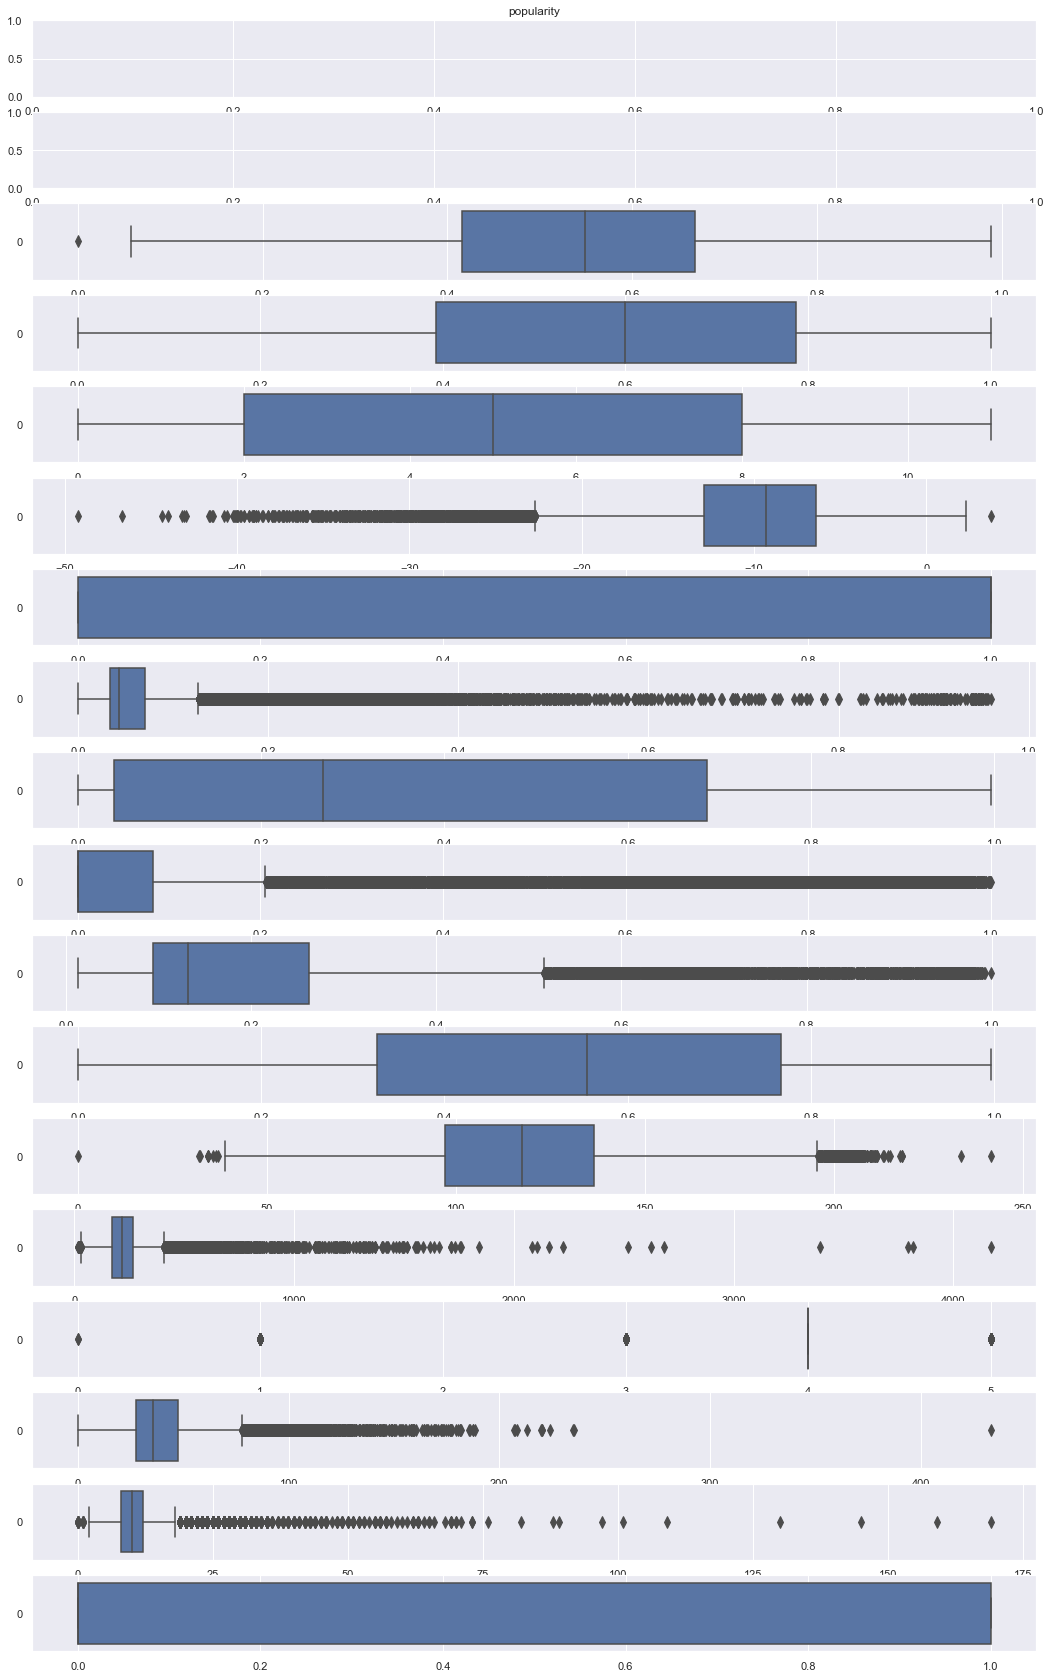

In [11]:
# Draw the box-plot distribution of all 14 numeric variables

# import data about boxplots from matplotlib (since SeaBorn uses MatPlotLib for plotting)
from matplotlib.cbook import boxplot_stats  
f, axes = plt.subplots(18, 1, figsize=(18, 30))

count = 0

print("Sequence of Box Plots: ")
for var in songdata:
    if(var != "track" and var != "artist" and var != "decade" and var != "genre"):
        #print(var)
        print(count, ") ", var)
        print("Number of outliers = ", len(boxplot_stats(songdata[var]).pop(0)['fliers']), "\n")
        sb.boxplot(data = songdata[var], orient = "h", ax = axes[count], fliersize = 8.0)
        axes[0].set_title(var)
    count += 1

#sb.boxplot(data = songdata['danceability'], orient = "h", ax = axes[0], fliersize = 8.0)
#axes[0].set_title('danceability')

#sb.boxplot(data = songdata['energy'], orient = "h", ax = axes[1], fliersize = 8.0)
#axes[0].set_title('energy')


Sequence of Plots: 
0 )  danceability
Skewness: -0.235
Kurtosis: -0.445
1 )  energy
Skewness: -0.312
Kurtosis: -0.817
2 )  key
Skewness: 0.015
Kurtosis: -1.280
3 )  loudness
Skewness: -1.405
Kurtosis: 3.187
4 )  mode
Skewness: -0.829
Kurtosis: -1.314
5 )  speechiness
Skewness: 4.603
Kurtosis: 30.131
6 )  acousticness
Skewness: 0.468
Kurtosis: -1.274
7 )  instrumentalness
Skewness: 1.669
Kurtosis: 1.074
8 )  liveness
Skewness: 2.114
Kurtosis: 4.842
9 )  valence
Skewness: -0.175
Kurtosis: -1.063
10 )  tempo
Skewness: 0.482
Kurtosis: -0.075
11 )  duration_s
Skewness: 6.900
Kurtosis: 122.018
12 )  time_signature
Skewness: -3.526
Kurtosis: 19.339
13 )  chorus_hit
Skewness: 2.220
Kurtosis: 12.598
14 )  sections
Skewness: 6.168
Kurtosis: 106.780
15 )  popularity
Skewness: 0.106
Kurtosis: -1.989


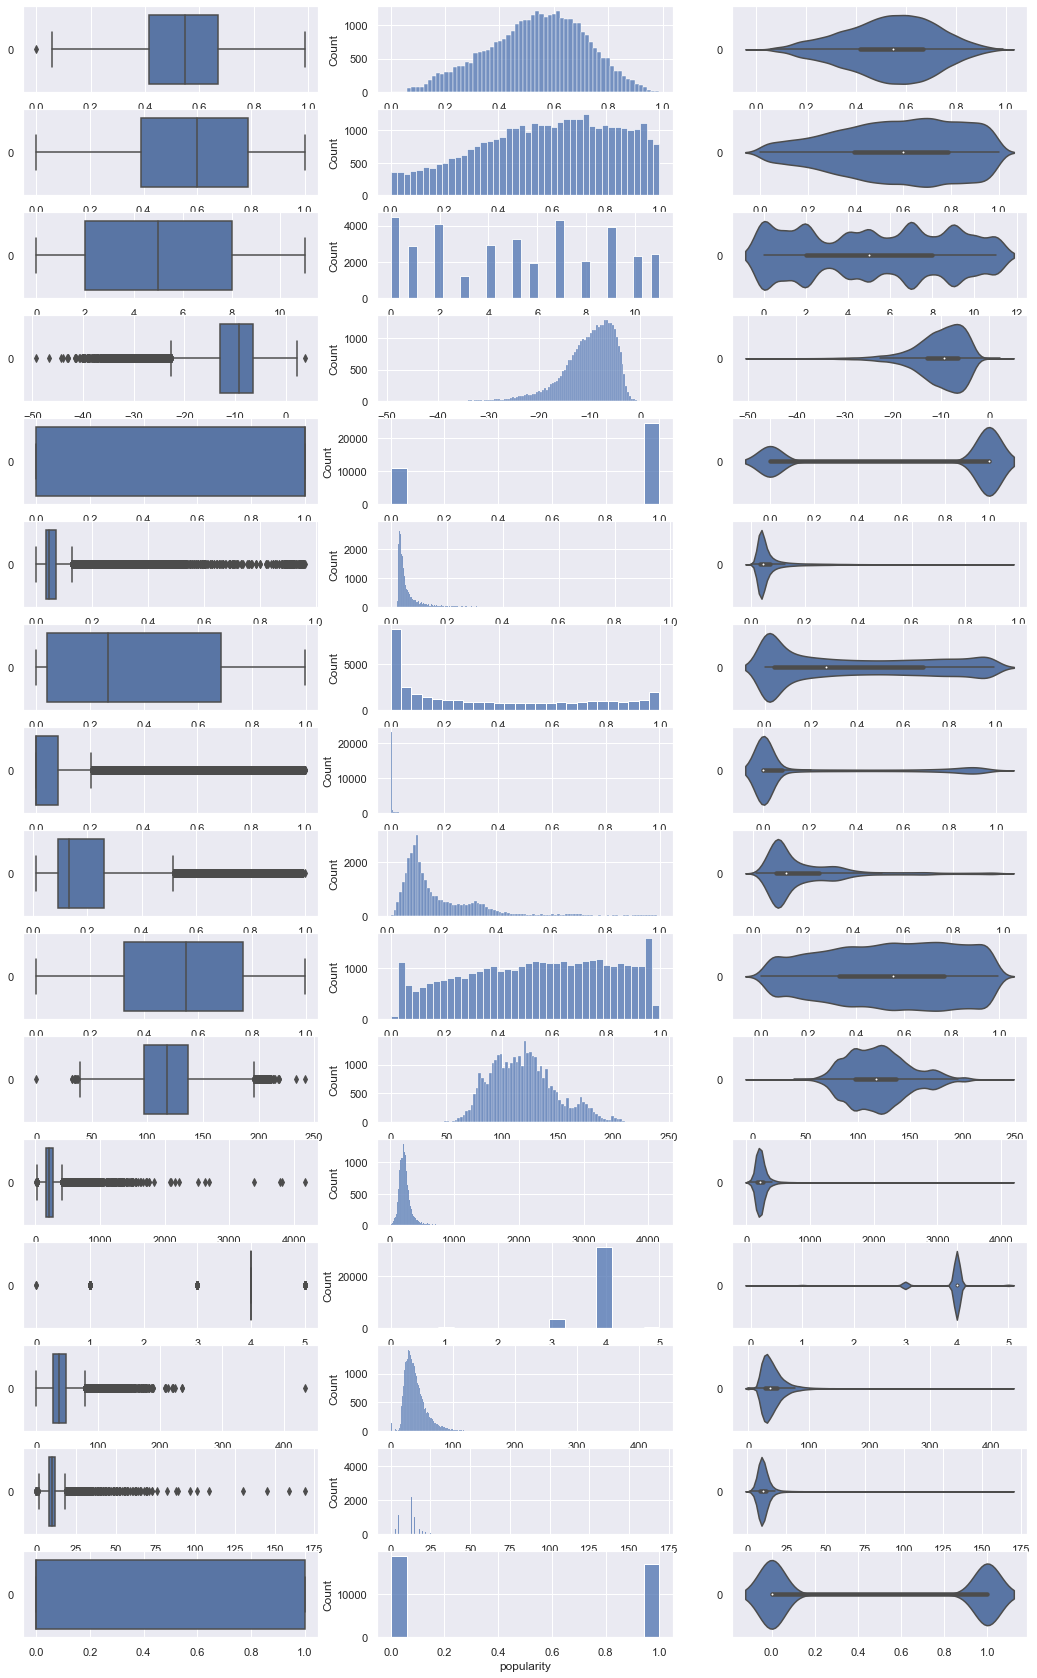

In [12]:
# Draw the histogram & violin plot distributions of all 4 variables
f, axes = plt.subplots(16, 3, figsize=(18, 30))

print("Sequence of Plots: ")
count = 0
for var in songdata:
    if(var != "track" and var != "artist" and var != "decade" and var != "genre"):
        print(count, ") ", var)
        sb.boxplot(data = songdata[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = songdata[var], ax = axes[count,1])
        sb.violinplot(data = songdata[var], orient = "h", ax = axes[count,2])
        count += 1

        print("Skewness: {:.3f}".format(songdata[var].skew()))
        print("Kurtosis: {:.3f}".format(songdata[var].kurt()))

                  danceability    energy       key  loudness      mode  \
danceability          1.000000  0.200430  0.016812  0.276695 -0.027138   
energy                0.200430  1.000000  0.023118  0.775412 -0.027383   
key                   0.016812  0.023118  1.000000  0.007561 -0.140541   
loudness              0.276695  0.775412  0.007561  1.000000  0.004590   
mode                 -0.027138 -0.027383 -0.140541  0.004590  1.000000   
speechiness           0.157832  0.119277  0.021583  0.066722 -0.056319   
acousticness         -0.255117 -0.716003 -0.023878 -0.567615  0.044688   
instrumentalness     -0.309012 -0.210374 -0.012909 -0.375221 -0.076134   
liveness             -0.119171  0.159334 -0.000514  0.088092  0.011231   
valence               0.557799  0.340420  0.010429  0.279962  0.038563   
tempo                -0.060677  0.224879  0.001812  0.171575  0.026706   
duration_s           -0.068819  0.009257  0.014187 -0.050737 -0.072132   
time_signature        0.186002  0.1953

<AxesSubplot:>

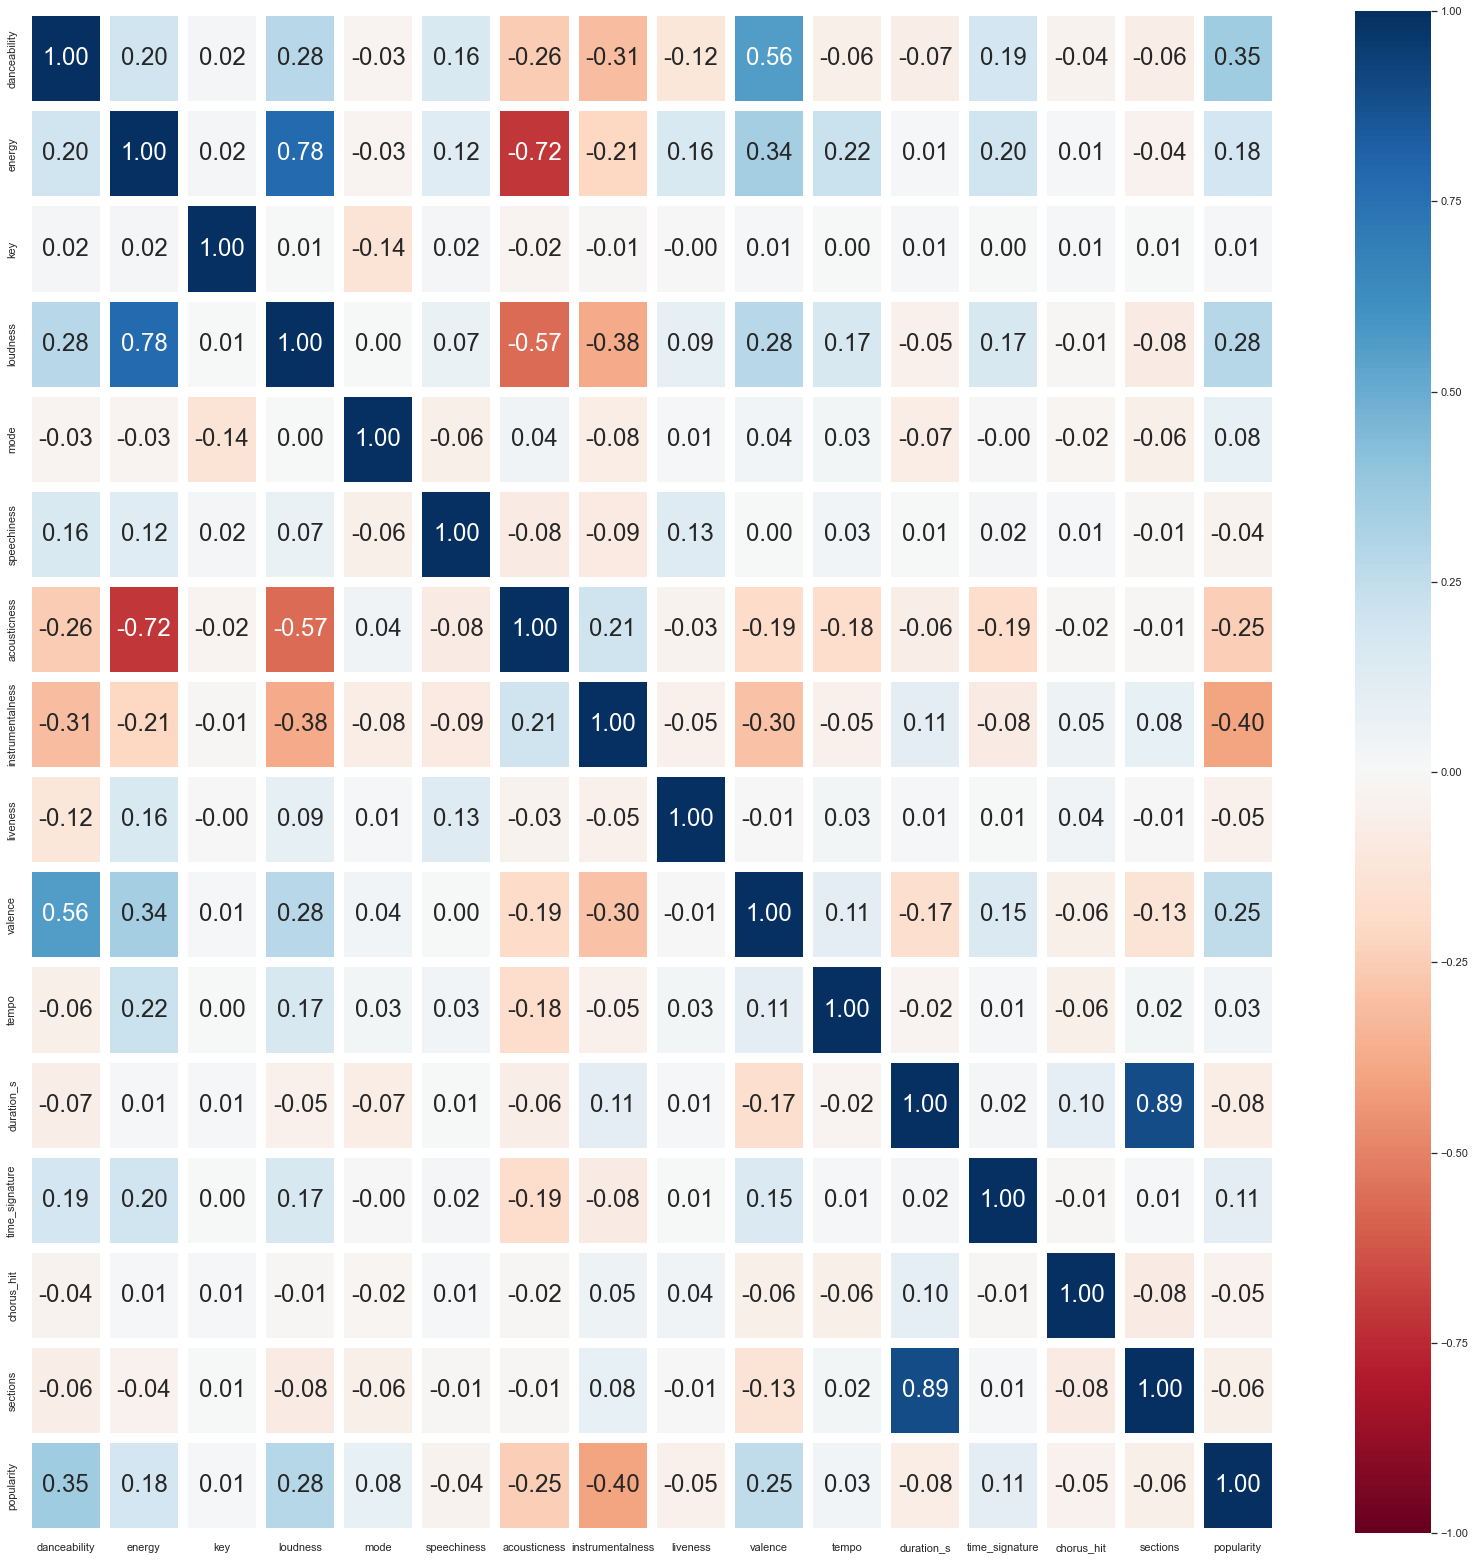

In [13]:
# Correlation Matrix
print(songdata.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(28, 28))
sb.heatmap(songdata.corr(), vmin = -1, vmax = 1, linewidths = 10,
           annot = True, fmt = ".2f", annot_kws = {"size": 24}, cmap = "RdBu")

Let's try to plot the scatter plots of Song Popularity against Instrumentalness and Danceability

Text(0, 0.5, 'Song Popularity')

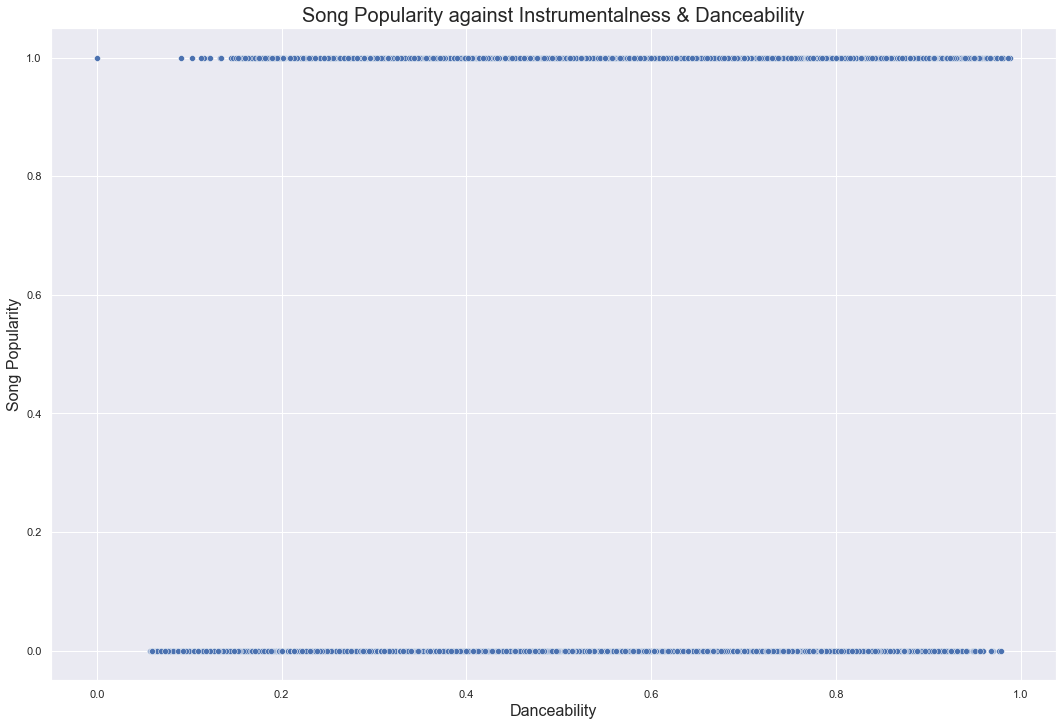

In [13]:
f, ax = plt.subplots(figsize=(18,12))
# = sb.scatterplot(x = "instrumentalness", y = "song_popularity", hue="danceability", data = songdata, palette="Greens", size="danceability")
ax = sb.scatterplot(x = "danceability", y = "popularity", data = songdata)

#ax.legend(loc='upper right')
ax.set_title('Song Popularity against Instrumentalness & Danceability', fontsize = 20, loc='center')
#ax.set_xlabel('Instrumentalness', fontsize = 16)
ax.set_xlabel('Danceability', fontsize = 16)
ax.set_ylabel('Song Popularity', fontsize = 16)

### Since no clear correlation is found on univariate linear regression, we use Feedforward Neural Network (Multi-layer Perceptron)


... results are as follows

MLPClassifier predicts classes that inputs fall into, and therefore we need to classify the song_popularity values and label encode them.

In [10]:
# Distribution of Genres before encoding

songdata['genre'].value_counts()

pop      14247
r&b       9499
rock      6157
latin     2497
rap       2127
edm       1326
Name: genre, dtype: int64

In [11]:
#popularity_class = []

#for var in songdata['song_popularity']:
#   if(0 <= var and var <= 50):
#        popularity_class.append(0)
#    else:
#        popularity_class.append(1)

#songdata['popularity_class'] = popularity_class
#songdata.head()

from sklearn.preprocessing import LabelEncoder

# label encoding song_popularity
songdata['genre'] = LabelEncoder().fit_transform(songdata['genre'])
songdata.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
28366,"Concerto for Harpsichord, Strings, and Continu...",Johann Sebastian Bach,0.366,0.00757,8,-37.867,1,0.0490,0.9900,0.884000,0.0885,0.328,182.062,176.000,3,82.57264,9,0,90s,0
28022,Everything's Gonna Be Alright,Naughty By Nature,0.883,0.64700,10,-14.054,0,0.1970,0.0633,0.000000,0.2540,0.739,101.649,291.867,4,37.66632,8,1,90s,3
25244,Buddy X,Neneh Cherry,0.830,0.58600,5,-8.457,1,0.0375,0.0832,0.000042,0.0797,0.678,102.864,169.000,4,44.17359,8,1,90s,2
27829,Bucktown,Smif-N-Wessun,0.769,0.83600,8,-4.150,1,0.2440,0.0618,0.000000,0.1820,0.651,88.978,237.720,4,64.95334,11,1,90s,4
28154,Personal Jesus,Depeche Mode,0.637,0.68200,11,-11.625,1,0.0366,0.0112,0.023400,0.0473,0.714,129.983,224.907,4,62.14972,6,1,90s,2


We now need to scale the predictor variables so that they can be used together to predict the popularity_class.

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections']] = MinMaxScaler().fit_transform(songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections']])

songdata.drop(columns=['popularity', 'track', 'artist', 'decade', 'time_signature', 'sections'], inplace=True)
songdata.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,chorus_hit,genre
count,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000
mean,0.543350,0.577640,5.198393,0.734854,0.691351,0.077077,0.370930,0.161870,0.192366,0.542389,0.494077,235.412968,0.092798,2.755167
std,0.181269,0.254805,3.533529,0.101619,0.461942,0.091748,0.342750,0.309411,0.176929,0.270009,0.121035,122.663760,0.044278,1.301983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.168000,0.000000,0.000000
25%,0.421053,0.391847,2.000000,0.685378,0.000000,0.035313,0.039458,0.000000,0.082252,0.327309,0.402551,172.213000,0.063651,2.000000
50%,0.555668,0.598899,5.000000,0.753590,1.000000,0.045625,0.268072,0.000143,0.120690,0.558233,0.486246,217.627000,0.082863,2.000000
75%,0.676113,0.786947,8.000000,0.808404,1.000000,0.073958,0.688755,0.082000,0.253550,0.770080,0.565837,267.093000,0.110293,3.000000
max,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4170.227000,1.000000,5.000000


In [13]:
songdata['genre'].value_counts()

2    14247
3     9499
5     6157
1     2497
4     2127
0     1326
Name: genre, dtype: int64

We note that the numbers of each songs per category are different. For example, there are 14247 songs in the Pop genre, whereas there are only 1326 songs in the EDM genre. Although using a Train/Test model would help to obtain random sampling of data, as there is a huge difference in sample size between song categories, we run the risk of introducing a significant sampling bias. 

Hence, we use Stratified Sampling Technique, which would help to eliminate the biasness of the selection of data.

Source: https://medium.com/@IrekponorVictor/creating-an-unbiased-test-set-for-your-model-using-stratified-sampling-technique-672b778022d5

In [20]:
# importing StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
# try out 10% test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)

for train_index, test_index in split.split(songdata, songdata['genre']):
     train_set, test_set = songdata.iloc[train_index], songdata.iloc[test_index]

# after obtaining train/test set, proceed to split train into X and y train set, and test into x and y test set
y_train = pd.DataFrame(train_set['genre'])
x_train = train_set
x_train = x_train.drop(columns=['genre', 'chorus_hit'])

y_test = pd.DataFrame(test_set['genre'])
x_test = test_set
x_test = x_test.drop(columns=['genre', 'chorus_hit'])

Check how many songs in each genre there are in train/test set

In [19]:
#x_train.value_counts()

In [20]:
#x_test.value_counts()

In [21]:
y_train.value_counts()

genre
2        12822
3         8549
5         5541
1         2247
4         1914
0         1194
dtype: int64

In [22]:
y_test.value_counts()

genre
2        1425
3         950
5         616
1         250
4         213
0         132
dtype: int64

After obtaining Train/Test data, use MLPClassifier

In [23]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [24]:
#y_train_minmax = MinMaxScaler().fit_transform(y_train)
#y_train_minmax = y_train_minmax.astype('int')
#y_train_normalized = (y_train-y_train.min())/(y_train.max()-y_train.min())

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(400, 350, 300, 250, 200), 
                           max_iter= 2000,activation = 'relu',
                           solver='sgd', learning_rate = 'adaptive', 
                           learning_rate_init = 0.0001, batch_size=10,
                           random_state=1)

classifier.fit(x_train, y_train.values.ravel())
y_pred = classifier.predict(x_train)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.9065608826355099


Try plotting the correlation matrix.

<AxesSubplot:>

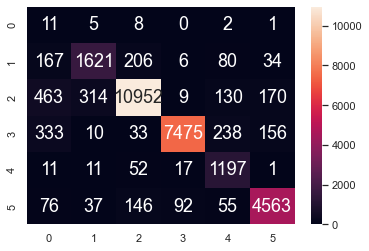

In [32]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

In [25]:
import pickle

# save the model to disk
filename = 'model_maxiter2000_batchsize10_10pctTest.sav'
pickle.dump(classifier, open(filename, 'wb'))

Check the accuracy on the test data.

In [24]:
# scale the response variable for test and predict
#y_test_minmax = MinMaxScaler().fit_transform(y_test)
#y_test_minmax = y_test_minmax.astype('int64')
#y_test_normalized = (y_test-y_test.min())/(y_test.max()-y_test.min())
y_test_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test_pred, y_test)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

Accuracy of MLPClassifier on test data : 0.8587365778831404


Verification with new dataset

In [46]:
validationdata = pd.read_csv('data/genres_v2.csv', low_memory=False)
validationdata.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'time_signature', 'Unnamed: 0', 'title'], inplace=True)
validationdata = validationdata.loc[validationdata['genre'].isin(['Pop', 'RnB', 'Rap'])]
validationdata.drop_duplicates(subset=['song_name'], keep='first')

for index_label, row_series in validationdata.iterrows():
    if validationdata.at[index_label , 'genre'] == 'Pop':
        validationdata.at[index_label , 'genre'] = 2
    elif validationdata.at[index_label , 'genre'] == 'RnB':
        validationdata.at[index_label , 'genre'] = 3
    elif validationdata.at[index_label , 'genre'] == 'Rap':
        validationdata.at[index_label , 'genre'] = 4

validationdata['genre'] = pd.to_numeric(validationdata['genre'])

Accuracy of MLPClassifier on test data : 0.34460072595281305


<AxesSubplot:>

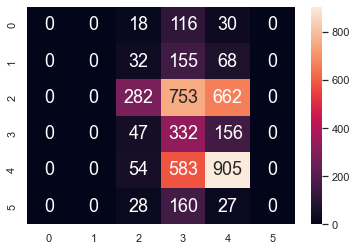

In [47]:
validationdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence', 'mode', 'speechiness', 'tempo']] = MinMaxScaler().fit_transform(validationdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence', 'mode', 'speechiness', 'tempo']])
validationdata.drop(columns=['song_name'], inplace=True)

## converting duration_ms to duration_s as duration_s was used in original dataset
validationdata["duration_ms"] = validationdata["duration_ms"]/1000
validationdata.rename(columns={"duration_ms":"duration_s"},inplace=True)

response = pd.DataFrame(validationdata['genre'])
predictor = validationdata
predictor = validationdata.drop(columns=['genre'])

validation_pred = classifier.predict(predictor)
cm = confusion_matrix(validation_pred, response)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})